Używane biblioteki

In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np

Interpolacja Hermite'a

Zakladam, ze input jest postaci

xs = [x1, x2, x3, x4, ...]
ys = [ [y1, y1', y1'', ...], ... ], czyli do kazdego x-a przypisana jest lista y-ów, z której każdy kolejny oznacza wartość w kolejnej pochodnej

In [3]:
#Funkcja pomocnicza do wypisywania macierzy z wartościami
def pretty_print(array):
    
    for row in array:
        for el in row:
            print(el, end = ' ')
        print("")

In [4]:
def hermite_interpolation(xs, ys, x):

    #Tworzy wektor z wartośami [x1, x1, x1, x2, x2, ...], gdzie ilośc xi to ilość wartości funkcji i pochodnych dla danego x-a
    x_map = []
    for i, mi in enumerate(ys):
        for _ in range(len(mi)):
            x_map.append(xs[i])

    #Wyznaczam sumę krotności
    m = sum([len(mi) for mi in ys])
    
    #Tworzę początkową macierz
    A = [[ None for j in range(m)] for i in range(m)]
    
    #Wypełniam macierz znanym wartościami f(x)
    current_row = 0
    for mi in ys:
        for j in range(len(mi)):
            A[current_row][0] = mi[0]
            current_row += 1
            
    #Wypełniam macierz znanymi wartościami pochodnych
    row = 0
    for mi in ys:
        for i in range(len(mi)):
            for j in range(1, i + 1):
                A[row][j] = mi[j] / math.factorial(j)
            row += 1
            
    #Wypełniam macierz wylioczonymi różnicami i wyliczam wspolczynniki
    coefficients = [A[0][0]]
    for i in range(1, m): #Aktualna pozycja do ktorej zmierzamy
        for j in range(1, i + 1):
            if A[i][j] == None:
                A[i][j] = (A[i][j - 1] - A[i - 1][j - 1]) / (x_map[i] - x_map[i - j])
        coefficients.append(A[i][i])
        
    #pretty_print(A)
    
    diffs = [x - xi for xi in x_map]
    
    w = coefficients[0]
    
    for i in range(1, m):
        
        temp = coefficients[i]
        
        for j in range(0, i):
            temp *= diffs[j]
            
        w += temp
        
    return w  

Równomiernie rozprowadzone punkty

In [5]:
#return evenly distrubuted x arguments on [a, b]
def get_evenly_distributed(a, b, n = 100):
    
    length = abs(b - a)
    h = length / (n - 1)
    
    return [a + i * h for i in range(n - 1)] + [b]

Zera wielomianu Czebyszewa - Inaczej węzły Czebyszewa. Są często używane jako węzły w interpolacji wielomianowej,
ponieważ wynikowy wielomian interpolacyjny minimalizuje efekt Rungego, czyli duże oscylacje wielomianu interpolacyjnego przy krańcach przedziału.

Reference: https://pl.wikipedia.org/wiki/W%C4%99z%C5%82y_Czebyszewa

In [6]:
def get_chebyshev_nodes(a, b, n):

    nodes = []

    for k in range(1, n + 1): #n + 1, because range is exclusive on the right side

        nodes.append( 0.5 * (a + b) + 0.5 * (b - a) *  math.cos( ( (2 * k - 1) / (2 * n) ) * math.pi ) )
    
    return nodes[::-1] #Flipping an array in order to it being consistent with input range

Rysowanie wykresu funkcji zadanej wzorem

In [7]:
def plot_function(func, range_a, range_b, func_x = None):
    
    if func_x == None:
        func_x = np.linspace(range_a, range_b, 10000)
        
    func_y = [func(func_x[i]) for i in range(len(func_x))]

    plt.plot(func_x, func_y, label = "Zadana funkcja", color = 'blue')

    plt.legend()
    plt.grid(True)
    plt.savefig("zadana_funkcja.png")

Zadana funkcja

f(x) = 10 * m + x^2 / k - 10 * m * cos(kx)

k = 1.5
m = 3
x z przedzialu [-4pi, 4pi]

In [8]:
f_range_a = -4 * math.pi
f_range_b = 4 * math.pi

In [9]:
def f(x):
    return 30 + (x**2 / 1.5) - 30 * math.cos(1.5 * x)

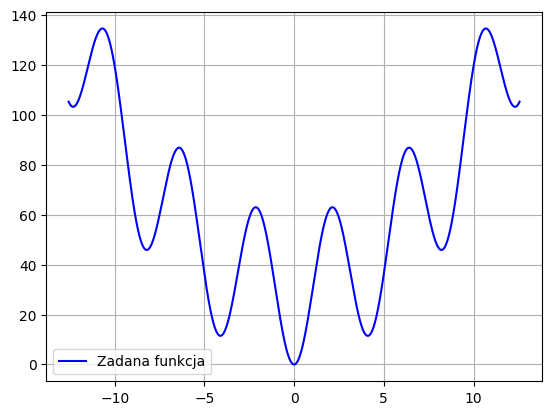

In [10]:
plot_function(f, f_range_a, f_range_b)
plt.show()

Pierwsza pochodna funkcji f(x)

g(x) = f'(x) = 45 * sin(1.5 * x) + 4x / 3

In [11]:
def g(x):
    return 45 * math.sin(1.5 * x) + ( (4 * x) / 3)

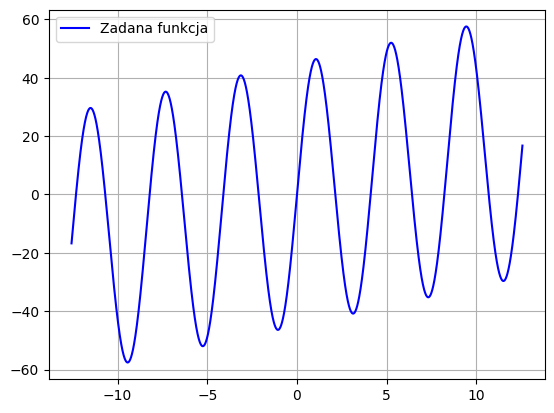

In [12]:
plot_function(g, f_range_a, f_range_b)
plt.show()

Interpolacja

In [13]:
def interpolate(point_generation_function, n, test_points_count, nodes_plot_label = 'Węzły'):
    
    xs = point_generation_function(f_range_a, f_range_b, n)
    
    ys = [ (f(xs[i]), g(xs[i])) for i in range(len(xs))]

    check_x = get_evenly_distributed(f_range_a, f_range_b, test_points_count)
    check_y = []

    for i in range(len(check_x)):

        check_y.append(hermite_interpolation(xs, ys, check_x[i]))

    plot_function(f, f_range_a, f_range_b)
    plt.plot(check_x, check_y, color = 'red', label = "Funkcja interpolująca")
    plt.scatter(xs, np.array(ys)[:, 0], color = 'black', label=nodes_plot_label)
    
    plt.legend()
    plt.grid(True)
    plt.savefig("interpolacja.png")
    plt.show()


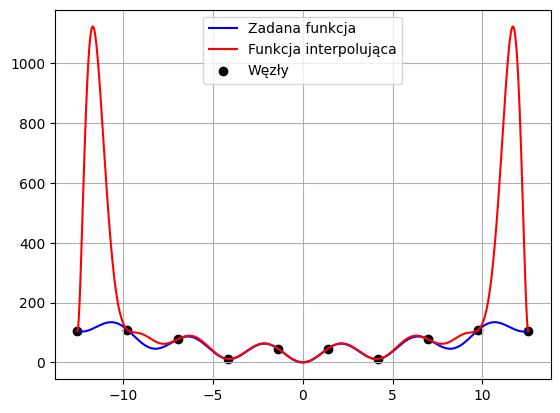

In [15]:
interpolate(get_evenly_distributed, 10, 1000)

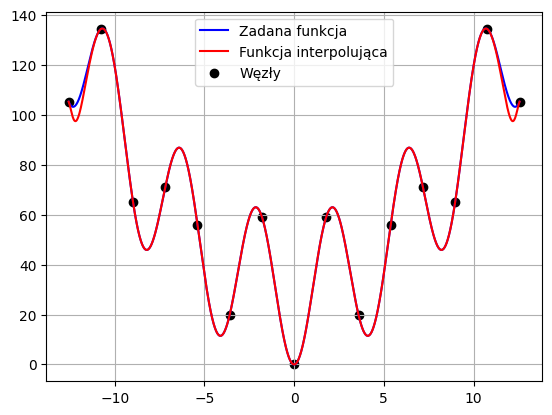

In [14]:
interpolate(get_evenly_distributed, 15, 1000)

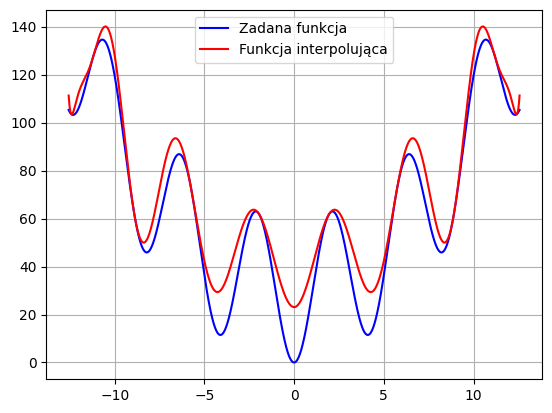

In [16]:
interpolate(get_chebyshev_nodes, 10, 1000)

Różnica między wielomianem interpolowanym, a wielomienaem interpolującym

1. Maksimum

max na x należącym do [-4pi, 4pi] z |F(x) - Pn(x)|

2. Błąd średniokwadratowy

!/N suma (F(x) - Pn(x))^2

1. Maksumum

1.1 Różnica maksimum dla interpolacji Hermite'a z równomiernie wygenerowanymi węzłami

In [17]:
def interpolation_maximum_difference(point_generation_function, test_points_count, interpolation_range_a, intepolation_range_b):

    #Wartości n do przetestowania od 3 do 30
    N = [i for i in range(interpolation_range_a, intepolation_range_b + 1)]

    for i in range(len(N)):

        maksimum = float('-inf')

        xs = point_generation_function(f_range_a, f_range_b, N[i])
        ys = [ (f(xs[i]), g(xs[i])) for i in range(len(xs))]

        test_x = get_evenly_distributed(f_range_a, f_range_b, test_points_count)
        
        for j in range(test_points_count):

            temp = abs(f(test_x[j]) - hermite_interpolation(xs, ys, test_x[j]))

            maksimum = temp if temp > maksimum else maksimum
    
        print(f"{maksimum}")

In [19]:
interpolation_maximum_difference(point_generation_function=get_evenly_distributed, test_points_count=1000, interpolation_range_a=3, intepolation_range_b=30)

59.998664944512306
59.9986649445126
49.7956123162688
225.22503911334
59.99866494451386
784.6180626866017
1189.120325710208
1009.2933583229004
593.1590567656885
263.88757570500786
93.37748721451985
27.163128899892797
6.647148448161644
1.3915894241701494
0.25336123347686623
0.040486377488932135
0.0058075876377756686
0.0010326456576876808
0.0004611592085694838
0.0010637449786514708
0.001635977529616639
0.0014555131479738748
0.0035517809408389667
0.0014553071712981591
0.005268847067668503
0.004465141141395179
0.007506891229468238
0.033318470286602064


In [21]:
interpolation_maximum_difference(point_generation_function=get_chebyshev_nodes, test_points_count=1000, interpolation_range_a=3, intepolation_range_b=30)

79.64971054530132
139.1125369639632
94.1425256895707
119.68872311513843
96.91581052477142
116.67587958925225
56.92762792294175
23.08718239945439
6.339504707239485
1.4342024554823183
0.2526956781405616
0.0376382495310222
0.004647113564082872
0.0004963667966785138
0.0002819640489661879
0.0004170483004770631
0.0007917057345991907
0.0015614160754324757
0.0020395388925322777
0.003112204262833984
0.003740463425074836
0.011653203015072222
0.010951117915212194
0.0228754407820162
0.018783126603565847
0.03324544052266276
0.02681266281295791
0.05430495888285236


In [23]:
interpolation_maximum_difference(point_generation_function=get_evenly_distributed, test_points_count=1000, interpolation_range_a=31, intepolation_range_b=50)

0.10457966472685598
0.053398131049405606
0.6744693432515732
3.092821251700485
28.83361622832352
69.42667348953609
1963.9232037672489
33180.06818319869
128611.25667149702
715964.5211641514
15589793.470612545
23994937.12071554
327827719.6135713
2491072945.0739303
45649930264.03531
794764293791.3478
1749805447100.6284
40533611247572.07
290305181923966.3
2094280424450340.2


In [24]:
interpolation_maximum_difference(point_generation_function=get_chebyshev_nodes, test_points_count=1000, interpolation_range_a=31, intepolation_range_b=50)

0.07565612563524837
4.326846027054316
15.663290971919707
182.0892370113007
616.7414695153082
12896.291757511428
17369.08120816477
242005.2657756632
6654866.333852976
52196347.8019189
273142725.97437775
4224377934.3513627
22823195336.251453
456001783338.54645
17346859191079.352
42684686337299.62
415452901970013.1
1.4679087487688476e+16
6.701307363767854e+16
3.46836333364967e+18


2. Błąd średniokwadratowy

In [25]:
def interpolation_mean_difference(point_generation_function, test_points_count, interpolation_range_a, intepolation_range_b):

    #Wartości n do przetestowania od 3 do 30
    N = [i for i in range(interpolation_range_a, intepolation_range_b + 1)]

    for i in range(len(N)):

        suma = 0

        #Evenly distributed xs
        xs = point_generation_function(f_range_a, f_range_b, N[i])
        ys = [ (f(xs[i]), g(xs[i])) for i in range(len(xs))]

        test_x = get_evenly_distributed(f_range_a, f_range_b, test_points_count)
        
        for j in range(test_points_count):

            suma += (f(test_x[j]) - hermite_interpolation(xs, ys, test_x[j])) ** 2
    
        print(f"{suma / test_points_count}")

In [26]:
interpolation_mean_difference(point_generation_function=get_evenly_distributed, test_points_count=1000, interpolation_range_a=3, intepolation_range_b=30)

1348.6499999999962
1348.6499999999974
923.2303338452006
8382.722496071776
1348.6500000000042
62629.17050438974
119582.38037314294
74267.20112630526
22553.238293971674
3977.6023733520087
448.8926430581497
34.53311683441119
1.8943800084766198
0.07666988367939499
0.0023514895052527823
5.5865669475329965e-05
1.0509409076552812e-06
1.7468453792719497e-08
2.3730278769177324e-09
4.6242231605801584e-09
8.540746813595096e-09
1.4436562311435972e-08
4.956630198458883e-08
2.562812596529189e-08
9.598770958073834e-08
1.309269002203527e-07
2.896194587632062e-07
1.8691506078402452e-05


In [27]:
interpolation_mean_difference(point_generation_function=get_chebyshev_nodes, test_points_count=1000, interpolation_range_a=3, intepolation_range_b=30)

1281.3973484510402
5158.79597149693
2170.2521866004095
3131.77532538214
1642.593617588223
1459.2093427534069
556.6157972809842
97.51730467954847
8.991518690440431
0.486526934839022
0.01669444931859086
0.00038450810032398776
6.20775085924403e-06
7.278378010280575e-08
1.1739707228164544e-09
1.3446074478248113e-09
4.464963652121251e-09
1.2928422352402644e-08
3.967819793108699e-08
8.661307975563144e-08
1.7689523853162383e-07
6.211451275523034e-07
1.0462219172850698e-06
2.6628273110645035e-06
3.5960022314787825e-06
7.995559643000984e-06
8.455639620897867e-06
2.004433594856684e-05


In [28]:
interpolation_mean_difference(point_generation_function=get_evenly_distributed, test_points_count=1000, interpolation_range_a=31, intepolation_range_b=50)

0.00015770180392866943
3.3645664034432686e-05
0.001031128152056371
0.09266210239708567
4.1257426429890325
15.527326699191853
15395.65861589962
3864463.787208347
39989069.3923659
1197625710.6902397
623038305273.3395
1412377657364.7605
439626778775650.2
1.8559970090603976e+16
9.205598852591044e+18
1.6397632074220542e+21
9.892474109261316e+21
6.886476280927403e+24
2.4194465464163692e+26
8.647395674714718e+27


In [29]:
interpolation_mean_difference(point_generation_function=get_chebyshev_nodes, test_points_count=1000, interpolation_range_a=31, intepolation_range_b=50)

3.4822113544627774e-05
0.06322276344784919
0.8100822683236091
101.28586406158065
3646.765279493427
1215387.853161976
1457750.9201472593
188027832.2743056
283153688302.926
16960579088696.002
378264797752165.2
8.04128389739682e+16
1.5854493469467203e+18
6.236669086801833e+20
1.390729321203981e+24
3.9554533894736336e+24
8.635972018380032e+26
9.957294675347003e+29
2.944796163004853e+31
4.0109830944046725e+34


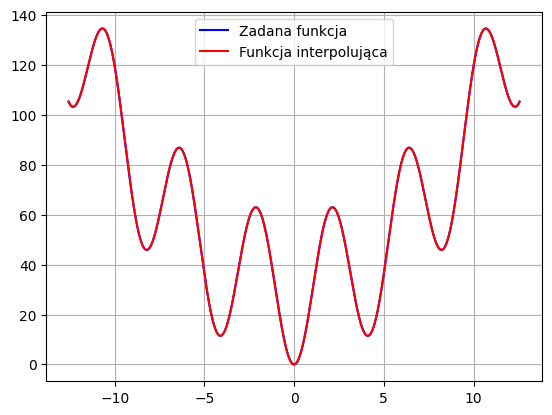

In [20]:
interpolate(get_chebyshev_nodes, 19, 1000)

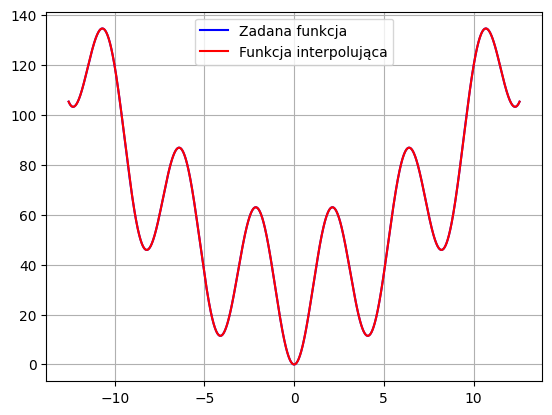

In [21]:
interpolate(get_evenly_distributed, 23, 1000)

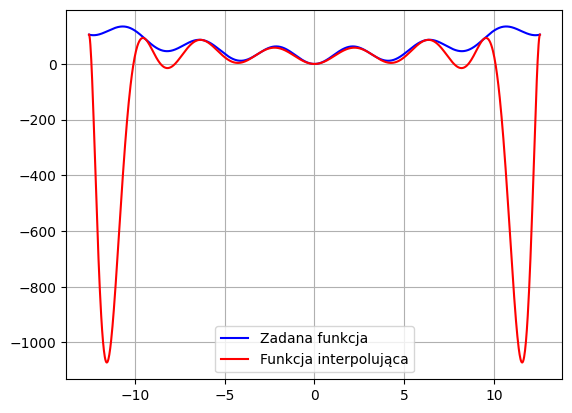

In [24]:
interpolate(get_evenly_distributed, 9, 1000)